In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io as sio
import scipy.io.wavfile
from scipy.io.wavfile import write
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft

Leitura do arquivo .wav

In [114]:
file = 'DigitoDTMF_9.wav'
fs,bc = scipy.io.wavfile.read(file)


SAMPLE_RATE = 44100  # Hertz
DURATION = 2  # Seconds

In [115]:
a = Audio(file)
a

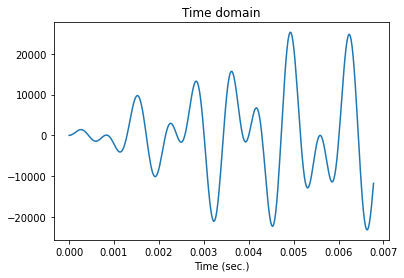

In [116]:
# create a time vector based on the data sampling rate
n = len(bc)
timevec = np.arange(0,n)/SAMPLE_RATE
npoints = 300
# plot the data from the two channels
plt.plot(timevec[:npoints],bc[:npoints])
plt.xlabel('Time (sec.)')
plt.title('Time domain')
plt.show()

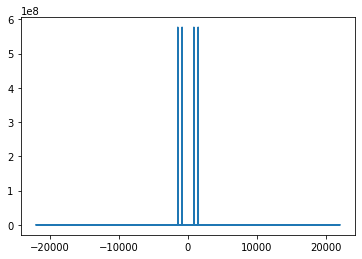

In [117]:
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(bc)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [118]:
tones_index = np.where(abs(yf)>3e8)
tones_index

(array([ 1704,  2954, 85246, 86496]),)

In [119]:
for i in tones_index:
  print(xf[i])

[  852.  1477. -1477.  -852.]


Usando rfft

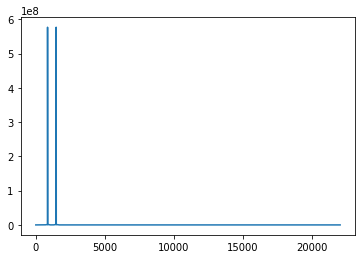

In [120]:
# Note the extra 'r' at the front
yf = rfft(bc)
xf = rfftfreq(N, 1 / SAMPLE_RATE)
npoints = 3000
plt.plot(xf, np.abs(yf))
plt.show()

Filtrando a componente de 852Hz

In [121]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 852)

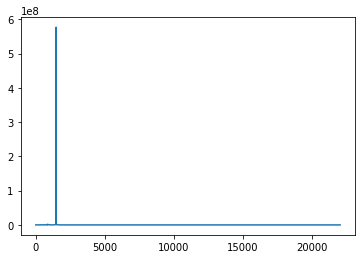

In [122]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

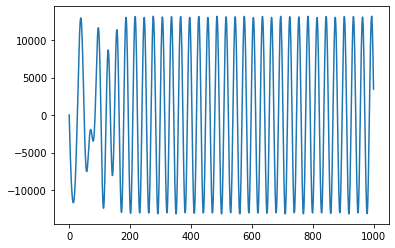

In [123]:


new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [124]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)